# 02. Neural Network Classification

classification problem : binary classification : is it one thing or another

Is it a spam or not a spam

Multiclass classification : is it a photo of a pizza, sushi or steak (we can have any number of classes). One photo, one classification among many

Multilabel classification: Predict what categories should be assigned to a Wikipedia article. One sample, multiple labels

### what are we going to cover


* Architecture of a classification model
* Input shapes and output shapes
* Creating custom data to view and fit
* Steps in modelling for binary and mutliclass classification
* The power of non-linearity
* Evaluating classification models

### Typical architecture of a classification neural network

* An input layer
* Some hidden layers
* An output layer


<table>
<thead><tr><td>Hyperparameter</td><td>Binary Classification</td><td>Multiclass classification</td></tr></thead>
<tbody><tr><td>Input layer shape</td><td>Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction)</td><td>Same as binary classification</td></tr>
<tr><td>Hidden layer(s)</td><td>Problem specific, minimum = 1, maximum = unlimited</td><td>Same as binary classification</td></tr>
<tr><td>Neurons per hidden layer</td><td>Problem specific, generally 10 to 100</td><td>Same as binary classification</td></tr>
<tr><td>Output layer shape 	</td><td>1 (one class or the other) 	</td><td>1 per class (e.g. 3 for food, person or dog photo)</td></tr>
<tr><td>Hidden activation 	</td><td>Usually ReLU (rectified linear unit) 	</td><td>Same as binary classification</td></tr>
<tr><td>Output activation 	</td><td>Sigmoid 	</td><td>Softmax</td></tr>
<tr><td>Loss function 	</td><td>Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow) 	</td><td>Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)</td></tr>
<tr><td>Optimizer 	</td><td>SGD (stochastic gradient descent), Adam 	</td><td>Same as binary classification</td></tr>
</tbody>
</table>

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron

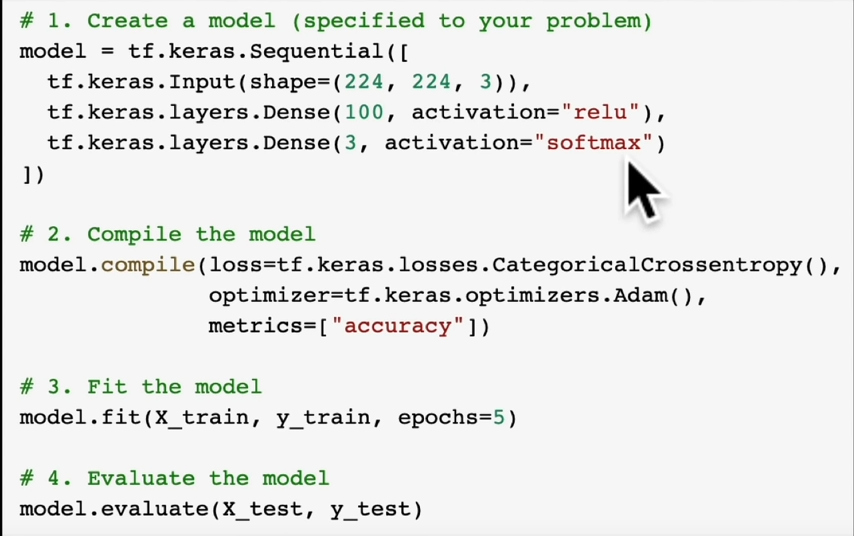

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


### Creating data to view and fit

To predict classification, we'll use Scikit-Learn's make_circles() function.

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [4]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Vizualize the data

To do that, we use a dataframe

In [6]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


What kind of labels do we have?

In [7]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

We have only two labels : 0 and 1 . So it is a binary classification problem

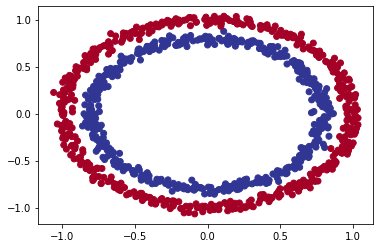

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Classify red or blue dots


See https://playground.tensorflow.org